In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('data/Students Social Media Addiction.csv')
df.head(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^0-9a-z_]', '')

In [4]:
print("\nDataset information:")
df.info()

print("\nSummary statistics of numerical variables:")
df.describe()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    705 non-null    int64  
 1   age                           705 non-null    int64  
 2   gender                        705 non-null    object 
 3   academic_level                705 non-null    object 
 4   country                       705 non-null    object 
 5   avg_daily_usage_hours         705 non-null    float64
 6   most_used_platform            705 non-null    object 
 7   affects_academic_performance  705 non-null    object 
 8   sleep_hours_per_night         705 non-null    float64
 9   mental_health_score           705 non-null    int64  
 10  relationship_status           705 non-null    object 
 11  conflicts_over_social_media   705 non-null    int64  
 12  addicted_score                705 non-null

,student_id,age,avg_daily_usage_hours,sleep_hours_per_night,mental_health_score,conflicts_over_social_media,addicted_score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [5]:
# Convert categorical variables to appropriate data types if needed
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in gender:
gender
Female    353
Male      352
Name: count, dtype: int64

Unique values in academic_level:
academic_level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

Unique values in country:
country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64

Unique values in most_used_platform:
most_used_platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64

Unique values in affects_academic_performance:
affects_academic_performance
Yes    453
No     252
Name: count, dtype: int64

Unique values in relationship_status:
relationship_status
Single             384
In Relati

In [6]:
df.isnull().sum()

student_id                      0
age                             0
gender                          0
academic_level                  0
country                         0
avg_daily_usage_hours           0
most_used_platform              0
affects_academic_performance    0
sleep_hours_per_night           0
mental_health_score             0
relationship_status             0
conflicts_over_social_media     0
addicted_score                  0
dtype: int64

In [7]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())
df[duplicates].head()

Number of duplicate rows: 0


,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score


In [8]:
df.drop_duplicates(inplace=True)
print("Number of duplicates after cleaning:", df.duplicated().sum())

Number of duplicates after cleaning: 0


In [9]:
df.drop(columns=['student_id'], inplace=True)
df.drop(columns=['country'], inplace=True)

In [10]:
# Create age groups
bins = [15, 20, 25, 30, 35]
labels = ['16-20', '21-25', '26-30', '31-35']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [11]:
# Categorize social media usage hours
usage_bins = [0, 2, 4, 6, 12, 24]
usage_labels = ['Minimal (0-2h)', 'Moderate (2-4h)', 'High (4-6h)', 'Very High (6-12h)', 'Extreme (12h+)']
df['usage_category'] = pd.cut(df['avg_daily_usage_hours'], bins=usage_bins, labels=usage_labels)

In [12]:
# Categorize sleep hours
sleep_bins = [0, 5, 7, 9, 12]
sleep_labels = ['Poor (<5h)', 'Fair (5-7h)', 'Good (7-9h)', 'Excellent (9h+)']
df['sleep_Category'] = pd.cut(df['sleep_hours_per_night'], bins=sleep_bins, labels=sleep_labels)

In [13]:
top_platforms = df['most_used_platform'].value_counts().nlargest(5).index
df['most_used_platform'] = df['most_used_platform'].apply(lambda x: x if x in top_platforms else 'Other')

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,avg_daily_usage_hours,sleep_hours_per_night,mental_health_score,conflicts_over_social_media,addicted_score,gender_Male,academic_level_High School,academic_level_Undergraduate,most_used_platform_Instagram,...,age_group_21-25,age_group_26-30,age_group_31-35,usage_category_Moderate (2-4h),usage_category_High (4-6h),usage_category_Very High (6-12h),usage_category_Extreme (12h+),sleep_Category_Fair (5-7h),sleep_Category_Good (7-9h),sleep_Category_Excellent (9h+)
0,19,5.2,6.5,6,3,8,False,False,True,True,...,False,False,False,False,True,False,False,True,False,False
1,22,2.1,7.5,8,0,3,True,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,20,6.0,5.0,5,4,9,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
3,18,3.0,7.0,7,1,4,True,True,False,False,...,False,False,False,True,False,False,False,True,False,False
4,21,4.5,6.0,6,2,7,True,False,False,False,...,True,False,False,False,True,False,False,True,False,False


In [15]:
target = 'addicted_score'
X = df_encoded.drop(columns=[target])
y = df_encoded[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'models/social_media_addiction_model.pkl')

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.09269740347689395
R² Score: 0.9598977012419352


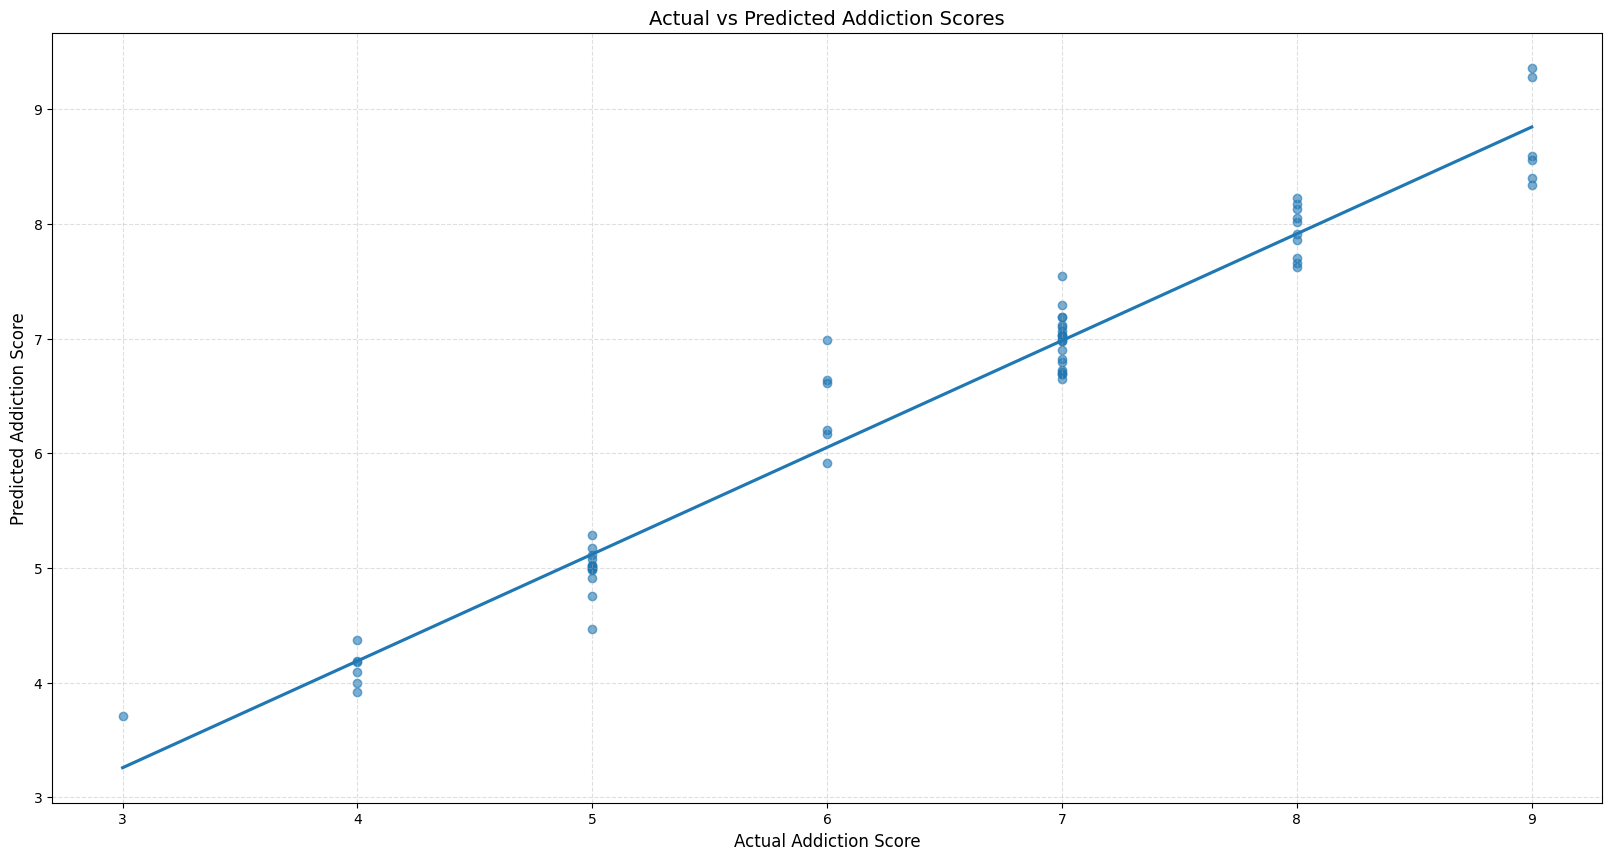

In [16]:
plt.figure(figsize=(20, 10))
sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={'alpha':0.6})
plt.xlabel("Actual Addiction Score", fontsize=12)
plt.ylabel("Predicted Addiction Score", fontsize=12)
plt.title("Actual vs Predicted Addiction Scores", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

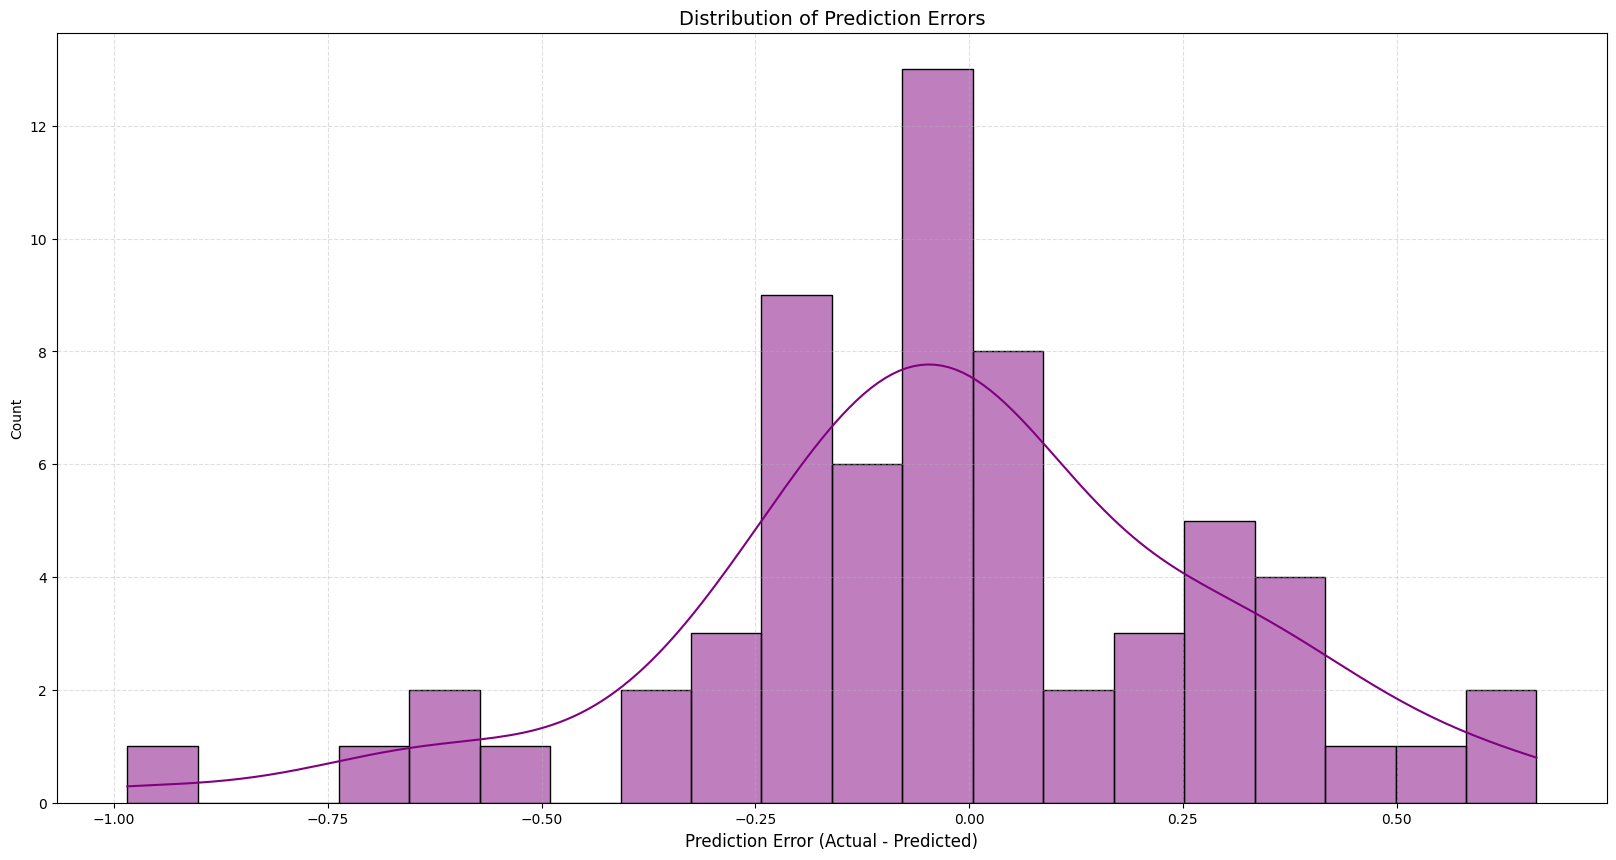

In [17]:
# residuals = y_test - y_pred
errors = y_test - y_pred

plt.figure(figsize=(20, 10))
sns.histplot(errors, bins=20, kde=True, color='purple')
plt.xlabel("Prediction Error (Actual - Predicted)", fontsize=12)
plt.title("Distribution of Prediction Errors", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()

# **Get coefficients and feature names**

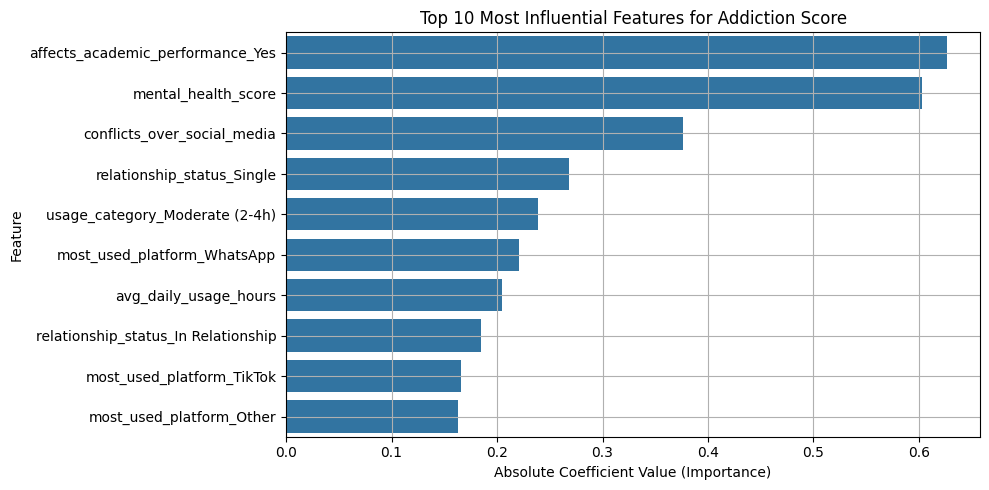

In [18]:
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients_sorted = coefficients.abs().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=coefficients_sorted[:10], y=coefficients_sorted.index[:10])
plt.title("Top 10 Most Influential Features for Addiction Score")
plt.xlabel("Absolute Coefficient Value (Importance)")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()